# Phone Service Customers Churn Prediction
### Muse Wu

---
## Goal
The project aims to predict for customer who is going to get churned. So that the customer service team can proactively approach the customer to provide them better services and turn customers' decisions in the opposite direction. Churn means that customers stop doing business with the company. The churn rate measures a company's loss in subscribers for a given period of time. The company can use the information to develop focused customer retention programs.

## Source

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

# Part 1: Data Overview

Our target variable is "Churn". Let's look at all the predictor variables.

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

---

## Column Context Information:

### Demographics
**CustomerID**: A unique ID that identifies each customer.

**Gender**: The customer’s gender: Male, Female

**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No

**Partner**: Indicates if the customer is married: Yes, No

**Dependents**: Indicates if the customer lives with any 

**Number of Dependents**: Indicates the number of dependents that live with the customer.



### Services
**Tenure**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**PhoneService**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company

**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection Plan**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company

**Tech Support**: Indicates if the customer subscribes to an additional premium technical support plan from the company with reduced wait times: Yes, No

**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

In [4]:
# Display all the columns/rows
pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.width', 1000)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

The majority of the variables are categorical variables. 

We can get a quick statistical summary for the numerical variables.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


I would consider the Senior Citizen a categorical variable since 1 represents the customer is a senior citizen and 0 represents not a senior citizen.

In [8]:
pd.concat([df.isnull().sum(),df.isnull().sum() * 100 / len(df)], axis=1)

,0,1
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


There is no missing value in any of the column. We can get into EDA without handling missing values.

# Part 2:  Exploratory Data Analysis

## Target Variable
First of all, we look at our target variable, Churn.

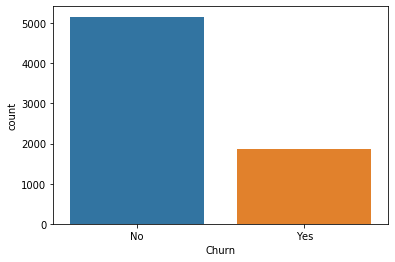

In [9]:
sns.countplot(df.Churn)
plt.show()

In [10]:
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

There are around 5000 customer remained with the compnay and 2000 left the company. The dataset is an **imbalanced classification** because of the unequal distribution of classes (Churn: Yes, No) in the training dataset. Imbalanced classification would lead to the minority class is more important and the prediction is sensitive to classification errors for the minority class than the majority class.

Therefore, we can use accuracy as the metric in our data. Instead, confusion matrix, precision, recall and F1-score would be great measurement of the prediction perfromance.

Also, we shall choose algorithms that work well with imbalnced datasets, such as Decision Trees and Random Forest.

## Predictor Variable
### Categorical Variables
We are interested in the correlation between the target variable and the predictor variables. To prepare the data for further investigation we convert the categorical data to dummy variables.

In [11]:
df_cat = pd.get_dummies(df[['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                            'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 
                            'PaperlessBilling','PaymentMethod']])

In [12]:
df_churn = pd.get_dummies(df['Churn'],drop_first=True, prefix="churn")

In [13]:
data = pd.concat([df_cat,df[["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]],df_churn], axis=1)

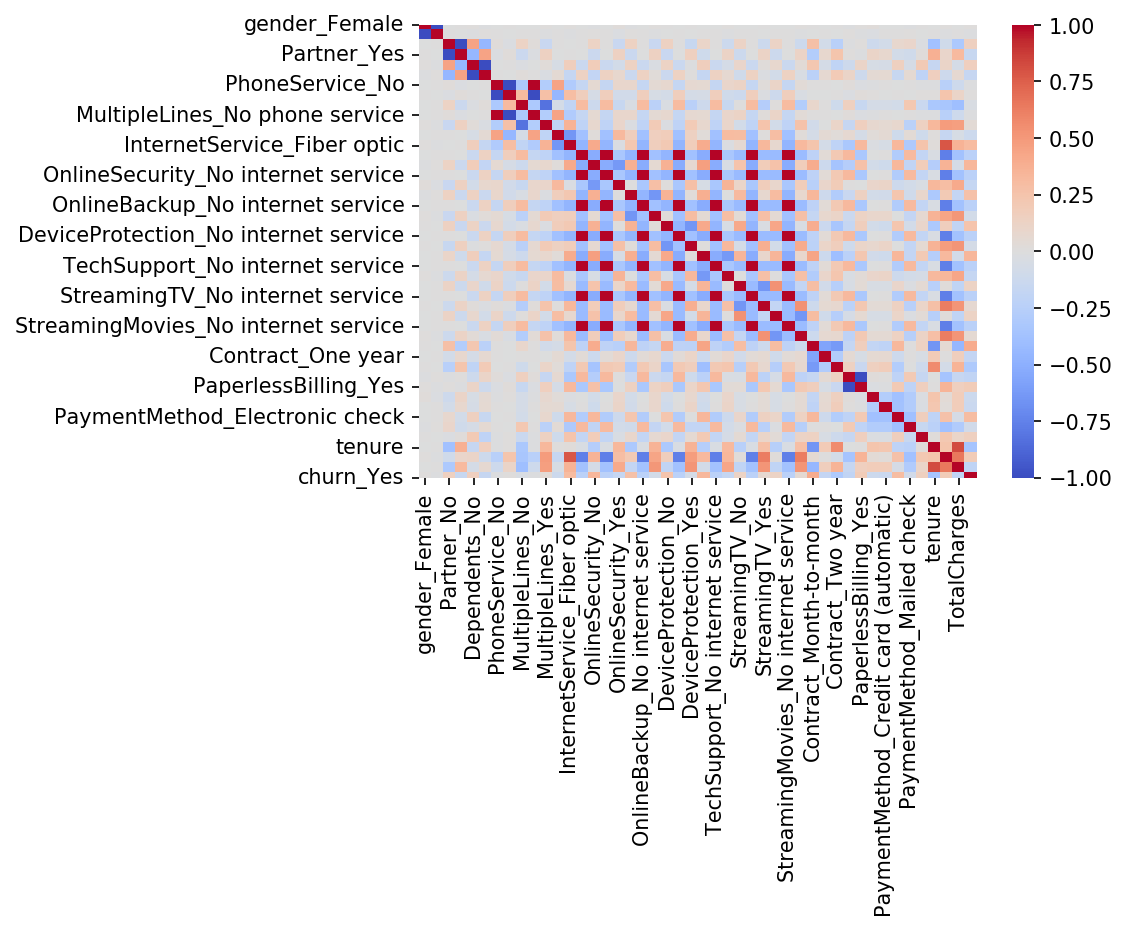

In [14]:
plt.figure(dpi=150)
sns.heatmap(data.corr(),cmap='coolwarm')
plt.show()

In [15]:
p = data.corr()
p.style.apply(lambda x: ["background: red" if v > 0.7 else "" for v in x], axis = 1)

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_Yes
gender_Female,1,-1,-0.00137905,0.00137905,0.0103489,-0.0103489,-0.00751498,0.00751498,-0.00433469,-0.00751498,0.00888274,-0.00758358,0.0111893,-0.00474497,-0.0108591,-0.00474497,0.0163278,-0.00860461,-0.00474497,0.0130928,0.00316272,-0.00474497,0.000806746,-0.0038153,-0.00474497,0.00850716,-0.00308814,-0.00474497,0.0071244,-0.00607837,-0.00474497,0.0101054,0.00325077,-0.00775485,0.00360317,-0.0119019,0.0119019,0.0159731,-0.00163187,-0.000843708,-0.0131994,0.00181939,-0.00528537,0.0137793,-4.78395e-05,0.00854464
gender_Male,-1,1,0.00137905,-0.00137905,-0.0103489,0.0103489,0.00751498,-0.00751498,0.00433469,0.00751498,-0.00888274,0.00758358,-0.0111893,0.00474497,0.0108591,0.00474497,-0.0163278,0.00860461,0.00474497,-0.0130928,-0.00316272,0.00474497,-0.000806746,0.0038153,0.00474497,-0.00850716,0.00308814,0.00474497,-0.0071244,0.00607837,0.00474497,-0.0101054,-0.00325077,0.00775485,-0.00360317,0.0119019,-0.0119019,-0.0159731,0.00163187,0.000843708,0.0131994,-0.00181939,0.00528537,-0.0137793,4.78395e-05,-0.00854464
Partner_No,-0.00137905,0.00137905,1,-1,0.452269,-0.452269,0.0183972,-0.0183972,0.130028,0.0183972,-0.142561,0.00104308,-0.00123461,0.00028552,0.129394,0.00028552,-0.143346,0.135626,0.00028552,-0.141849,0.146702,0.00028552,-0.153556,0.108875,0.00028552,-0.120206,0.123394,0.00028552,-0.124483,0.117488,0.00028552,-0.118108,0.280202,-0.0830671,-0.247334,-0.0139567,0.0139567,-0.111406,-0.0823274,0.0832066,0.096948,-0.0169566,-0.381912,-0.097825,-0.319072,0.149982
Partner_Yes,0.00137905,-0.00137905,-1,1,-0.452269,0.452269,-0.0183972,0.0183972,-0.130028,-0.0183972,0.142561,-0.00104308,0.00123461,-0.00028552,-0.129394,-0.00028552,0.143346,-0.135626,-0.00028552,0.141849,-0.146702,-0.00028552,0.153556,-0.108875,-0.00028552,0.120206,-0.123394,-0.00028552,0.124483,-0.117488,-0.00028552,0.118108,-0.280202,0.0830671,0.247334,0.0139567,-0.0139567,0.111406,0.0823274,-0.0832066,-0.096948,0.0169566,0.381912,0.097825,0.319072,-0.149982
Dependents_No,0.0103489,-0.0103489,0.452269,-0.452269,1,-1,-0.00107781,0.00107781,-0.0233877,-0.00107781,0.0243067,-0.0515932,0.164101,-0.138383,0.186979,-0.138383,-0.0807855,0.137421,-0.138383,-0.0236388,0.128053,-0.138383,-0.0138997,0.171164,-0.138383,-0.0630532,0.0999118,-0.138383,0.0164987,0.0782451,-0.138383,0.0383749,0.229715,-0.0692221,-0.201699,-0.110131,0.110131,-0.0523689,-0.0611341,0.149274,-0.0564484,0.21055,-0.163386,0.112343,-0.0646532,0.163128
Dependents_Yes,-0.0103489,0.0103489,-0.452269,0.452269,-1,1,0.00107781,-0.00107781,0.0233877,0.00107781,-0.0243067,0.0515932,-0.164101,0.138383,-0.186979,0.138383,0.0807855,-0.137421,0.138383,0.0236388,-0.128053,0.138383,0.0138997,-0.171164,0.138383,0.0630532,-0.0999118,0.138383,-0.0164987,-0.0782451,0.138383,-0.0383749,-0.229715,0.0692221,0.201699,0.110131,-0.110131,0.0523689,0.0611341,-0.149274,0.0564484,-0.21055,0.163386,-0.112343,0.0646532,-0.163128
PhoneService_No,-0.00751498,0.00751498,0.0183972,-0.0183972,-0.00107781,0.00107781,1,-1,-0.315218,1,-0.27953,0.452255,-0.290183,-0.171817,0.0585459,-0.171817,0.0916

The correlation heat map shows **strong positive** correlated to the following variables
1. InternetService_Fiber optic and MonthlyCharges
2. Tenure and TotalCharges
3. InternetService_No and StreamingMovies_No internet service, StreamingTV_No internet service, TechSupport_No internet service, TechSupport_No internet service, TechSupport_No internet service, DeviceProtection_No internet service, OnlineBackup_No internet service, OnlineSecurity_No internet service
4. OnlineBackup_No internet service and StreamingMovies_No internet service, StreamingTV_No internet service, TechSupport_No internet service, TechSupport_No internet service, TechSupport_No internet service, DeviceProtection_No internet service, OnlineBackup_No internet service, OnlineSecurity_No internet service
5. Any "No internet service" variable

The correlation heat map shows **strong negative** correlated to the following variables
1. PhoneService_Yes and MultipleLines_No phone service
2. MonthlyCharges and internet service_no variables

The correlation makes sense. If a person do not sign up for internet service, the preson would not have internet service for internet related products(streaming movies, streaming TV etc). Neither the person need online backup service. Internet service would likely be the most amount of change because the internet service is strongly positive correlated to monthly charges. It is interesting to see that the tenure and total charges have a positive correlation. The finding indicates that the longer the customer stay in the plan the higher the bill is. 

We need to pay attention to multicollinearity which are those variables have strong correlation. Multicollinearity makes the model filled with redundant variables and increases the error regression error estimates. If we see variables with strong correlation, we consider delete one of the variable which is not as strong correlated to the target variable. 

In [16]:
corr_matrix = data.corr()[['churn_Yes']].sort_values(by = ['churn_Yes'], ascending = False).drop(['churn_Yes'])
corr_matrix.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,churn_Yes
Contract_Month-to-month,0.4
OnlineSecurity_No,0.34
TechSupport_No,0.34
InternetService_Fiber optic,0.31
PaymentMethod_Electronic check,0.3
OnlineBackup_No,0.27
DeviceProtection_No,0.25
MonthlyCharges,0.19
PaperlessBilling_Yes,0.19
Dependents_No,0.16


The correlation between the target variable and the predictor variables is not strong. We can select those variables look related for further investigation, and remove those that may cause multicollinearity. Also, we see that all the contract options look important for the target variable.

### Selected Predictor variables

tenure, Contract_Two year, InternetService_No, TotalCharges, PaperlessBilling_Yes, Contract_One year, Dependents_Yes, Partner_Yes

Contract_Month-to-month, OnlineSecurity_No, TechSupport_No, InternetService_Fiber optic, PaymentMethod_Electronic check,    OnlineBackup_No, DeviceProtection_No, PaperlessBilling_Yes, SeniorCitizen(, MonthlyCharges)

### Numerical Variables
Since we drop Monthly Charge, we explore the 2 numerical variables pairwise with the Churn categories with a box/violin plot

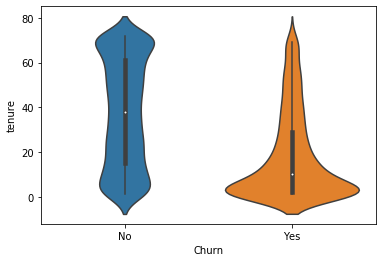

In [17]:
sns.violinplot(x = "Churn", y = "tenure", data = df)
plt.show()

The customers who left the company have service with a very short time (mean = 10 months) comparing with customers who stay in the company (mean = 40 months). Seems like people are likely to stick with a service once they have use the service for over 30 months. The company may want to promote service to the customers who switch to a new plan and use the new service for less than 2 years, because the duration in the first 2 years is the period that most likely the customer decides to churn. It is very rare to see customers churn if they have stay over 70 months. 

Let's look at the TotalCharges varaible.	

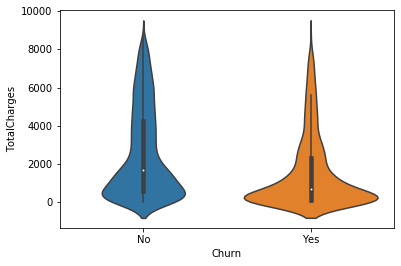

In [18]:
sns.violinplot(x = "Churn", y = "TotalCharges", data = df)
plt.show()

Both churn decisions customer have less than 2000 total charges each quarter. I realize the monthly charge * 3(3 months in a quarter) does not equal to the total charges. I assume there are more fee added in each quarter period which make the total charges of each contract type different. 

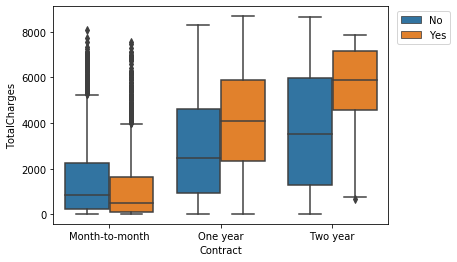

In [19]:
sns.boxplot(x = "Contract", y = "TotalCharges", hue = "Churn",data = df)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.show()

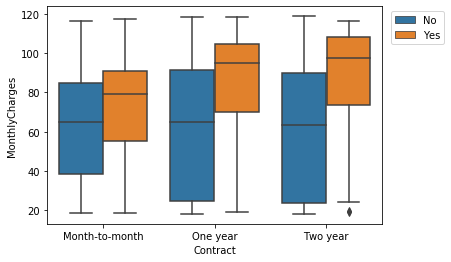

In [20]:
sns.boxplot(x = "Contract", y = "MonthlyCharges", hue = "Churn",data = df)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.show()

We have 2 findings in the plot. The customers who churn with One year or Two year contract always have higher monthly charges and total charges, also the longer the contract plan the more expensive the monthly fee. The charges difference between churn and not churn group is larger as the contract length extends. 

Let's look at number of people in each type of contract.

In [21]:
df.groupby(["Contract", "Churn"]).size()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
dtype: int64

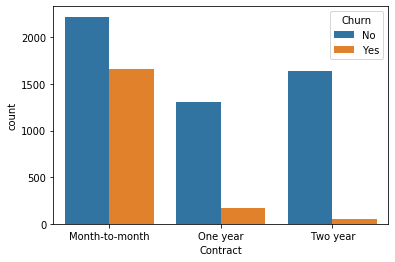

In [22]:
sns.countplot(x='Contract',hue='Churn',data=df)

Most of the customer who churn is in the Month-to-Month plan. People who sign up for month-to-month may only plan to stay in the service for couple months, so the churn count is very high.

The Churn rate in the one year contract is higher than the churn rate in the 2 year contract. **For long term contract users, we can provide coupon for one year contractor to improve the churn rate.**

Let's investigate the correaltion between churn and charges. Since a company would like to have more profit, we want to have higher total charges and low churn rate.

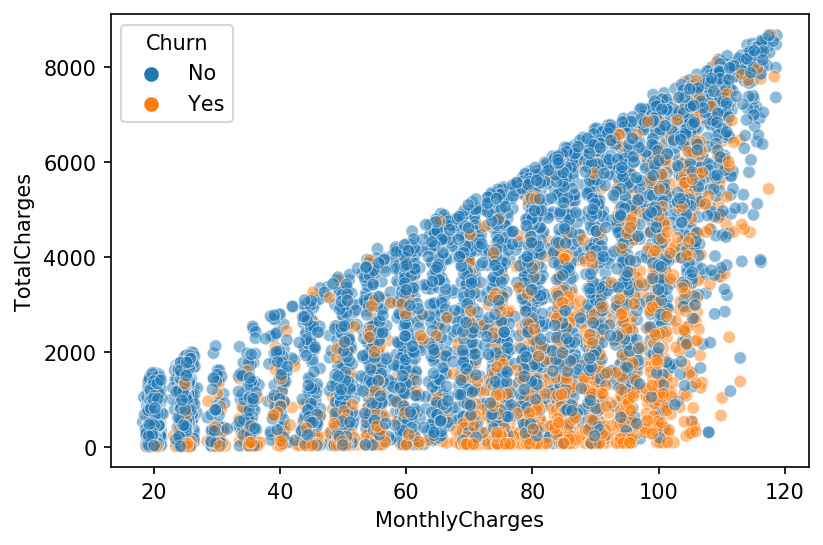

In [23]:
plt.figure(dpi=150)
sns.scatterplot(data=df,x="MonthlyCharges",y="TotalCharges",hue='Churn',alpha=0.5)
plt.show()

The graph shows that people with high monthly charges are likely to churn, but we do not get much total charges from them. It means that some people sign up for the plan for short term then left. 

**To improve the churn rate and profit, we can try to make people with high monthly charges stay longer in the service.**

# Part 3: Cohort Analysis

All the contract options('Month-to-month', 'One year', 'Two year') have influence to the target variable, so we focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments. 

Cohort analysis is a tool to measure user engagement over time. It allows us to seperate the growth metrics from engagement metrics. We can see the rentention over user lifetime and the retention over product lifetime.

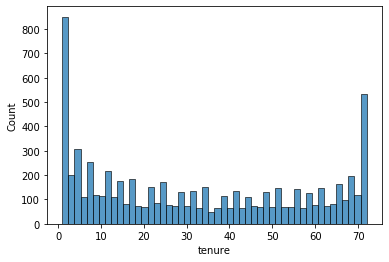

In [24]:
sns.histplot(data=df,x='tenure',bins=50)
plt.show()

The spike in the first and second months represent new users. Part of users may only need the service for short term. And a spike with long tenure represents people stick with the plan for a while. These people may want to stay in the plan no matter what because they have used to the service. The spikes with period in the middle happends when the yearly contract end. 

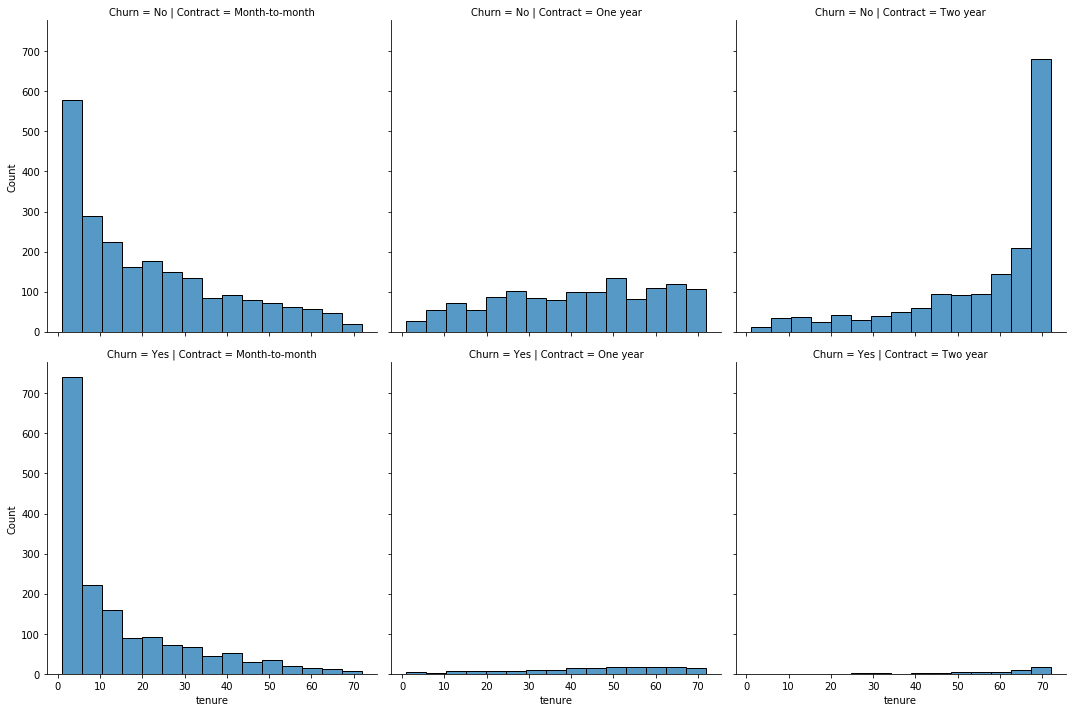

In [25]:
sns.displot(data=df,x='tenure',col='Contract',row='Churn')
plt.show()

The first column of the displot shows all users who use Month-to-Month contract. As the time goes by, the amount of user stay in the plan reduce. The second column shows that few of the user churn if they have the One year contract. As the time goes, the amount of people churn or not churn stay constant. The third column shows that the amount of user who choose the two year contract increase. I think that people who stay in the service switch their Month-to-Month plan to 2 year plan. 

**For short term users, we should focus on promoting the customer, who has month-to-month contract and plans to stay for more than 2 months, keep using the service or switch to long term contract.**

We treats each unique tenure monthly length as its own cohort group. We calculate the Churn rate per cohort as time goes from 1-72 months. We would like to see the churn rate trend for each cohort.

In [26]:
yes_churn = df[df['Churn']=='Yes']
yes_churn_cohort = yes_churn.groupby(["tenure"]).count()
no_churn = df[df['Churn']=='No']
no_churn_cohort = no_churn.groupby(["tenure"]).count()

In [27]:
cohort_churn_rate = yes_churn_cohort / (no_churn_cohort + yes_churn_cohort)
cohort_churn_rate['Churn']

tenure
1     0.619902
2     0.516807
3     0.470000
4     0.471591
5     0.481203
        ...   
68    0.090000
69    0.084211
70    0.092437
71    0.035294
72    0.016575
Name: Churn, Length: 72, dtype: float64

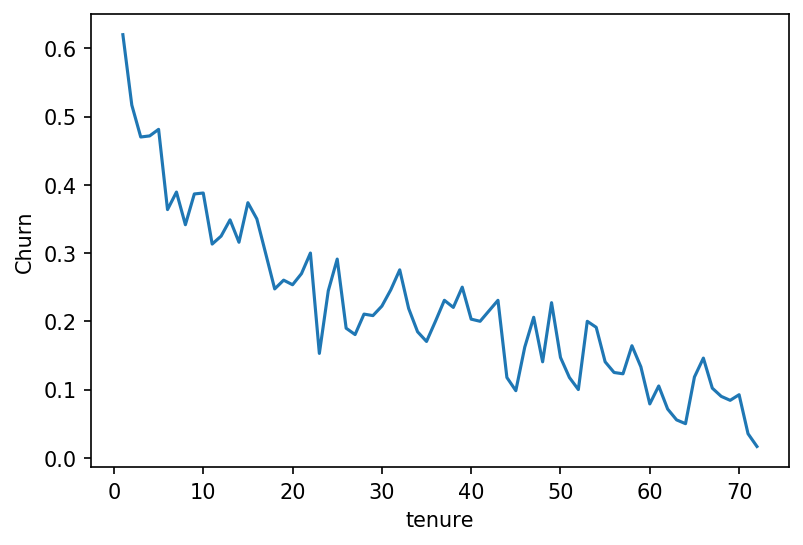

In [28]:
plt.figure(dpi=150)
sns.lineplot(x="tenure", y = "Churn", data=cohort_churn_rate)
plt.show()

We can see that the longer the cohort stay, the less churn rate in the cohort. Let's explore the cohort group and the charges. 

In [29]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 37:
        return '24-36 Months'
    elif tenure < 48:
        return '36-48 Months'
    elif tenure < 61:
        return '48-60 Months'
    else:
        return "Over 60 Months"
df["Month_Cohort"] = df['tenure'].apply(cohort)

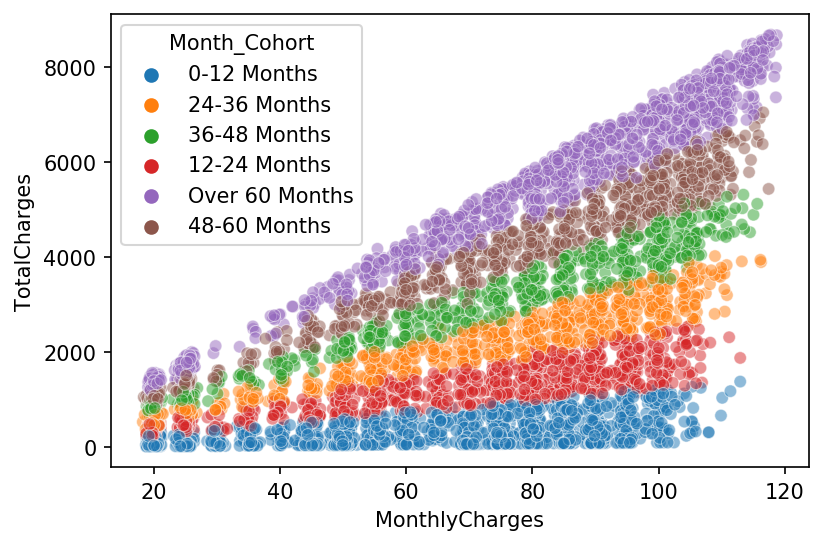

In [30]:
plt.figure(dpi=150)
sns.scatterplot(data=df,x="MonthlyCharges",y="TotalCharges",hue='Month_Cohort',alpha=0.5)
plt.show()

This graph shows us the following information:
1. Company can generate more profit from people stay for longer tenure, since the total charges increases.
2. People with longer tenure usually have higher monthly charges, since there are more people have over 110 monthly charges.

Combining with all the finding that we have so far, we have sufficient evidence to guess that the majority of the people who churn choose monthly payment and and stay in the 0-12 months cohort. Lets visualize and check if our conjecture would be correct.

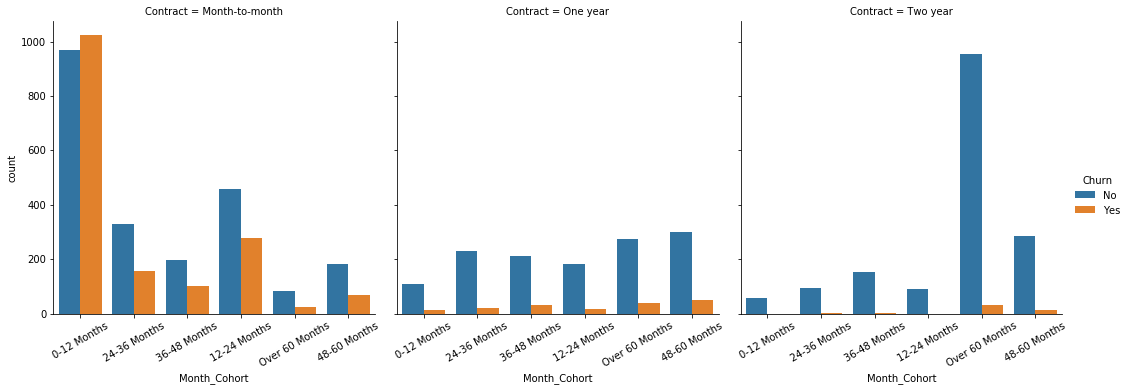

In [31]:
plot = sns.catplot(data=df,x='Month_Cohort',col='Contract',hue='Churn',kind='count')
plot.set_xticklabels(rotation=30)
plt.show()

We can narrow down the users that we should feed the promotion. As the graph shows that , users with month-to-month contract are likely to churn when the contract period comes to 12-24 months. The reason may be the company only have coupon for using month-to-month contract for a year. We can try to gives them another year month-to-month contract yearly promote or convert them to other type of ccontract. In general, we should let more user sign up for yearly contract and pay attention to keep the charges in a reasonable price range. 

-----

# Part 4: Predictive Modeling

Since we have an imbalance data, we apply tree based model for prediction. Models includes Decision Tree, Random Forest, AdaBoost and Gradient Boosting. The evaluation metic is confusion matrix, precision, recall and f1_score.


## Separate train and test data
30% of the data is test data, 70% data is train data

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, precision_score

In [33]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [36]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.82      0.85      0.83      1542
         Yes       0.54      0.48      0.51       568

   micro avg       0.75      0.75      0.75      2110
   macro avg       0.68      0.67      0.67      2110
weighted avg       0.74      0.75      0.75      2110



Feature importance

Text(0.5, 1.0, 'Feature Importance for Decision Tree')

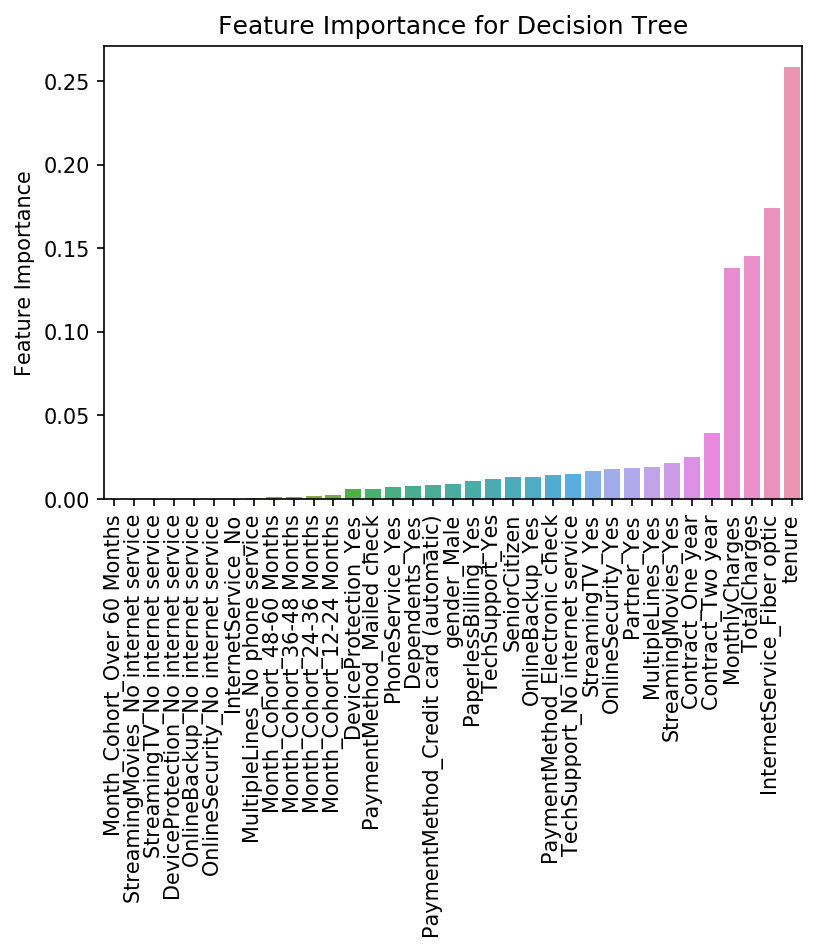

In [38]:
imp_feats = pd.DataFrame(data=clf.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(dpi=150)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree")

Find the optimal depth of the decision tree.

In [39]:
y1 = y.eq('Yes').mul(1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=88)

In [41]:
def cross_validation_trees(X, y, tree_depths, cv, scoring='precision'):
    cv_scores_mean = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_mean.append(cv_scores.mean())
    cv_scores_mean = np.array(cv_scores_mean)
    return cv_scores_mean
  
def plot_cross_validation_trees(depths, cv_scores_mean, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_xticks(depths)

tree_depths = range(1,25)
cv_scores_mean = cross_validation_trees(X_train, y_train, tree_depths, 10)

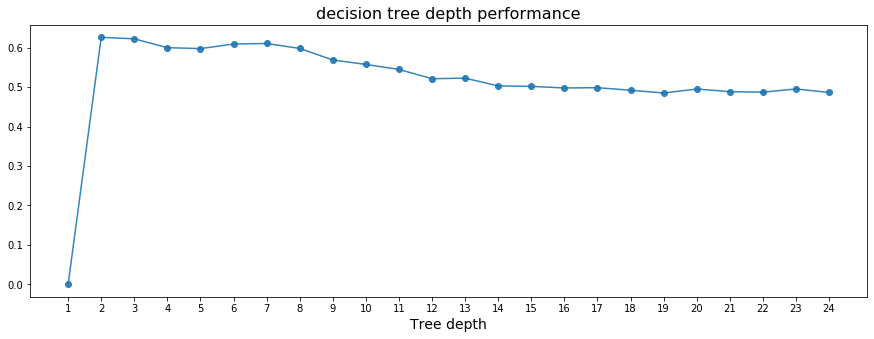

In [42]:
plot_cross_validation_trees(tree_depths, cv_scores_mean, 'decision tree depth performance')

In [43]:
idx_max = cv_scores_mean.argmax()
best_tree_depth = tree_depths[idx_max]
best_tree_cv_score = cv_scores_mean[idx_max]
print(best_tree_depth)
print(best_tree_cv_score)

2
0.6258656506049634


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_predict = rf.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1542
           1       0.64      0.49      0.56       568

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



Text(0.5, 1.0, 'Feature Importance for Decision Tree')

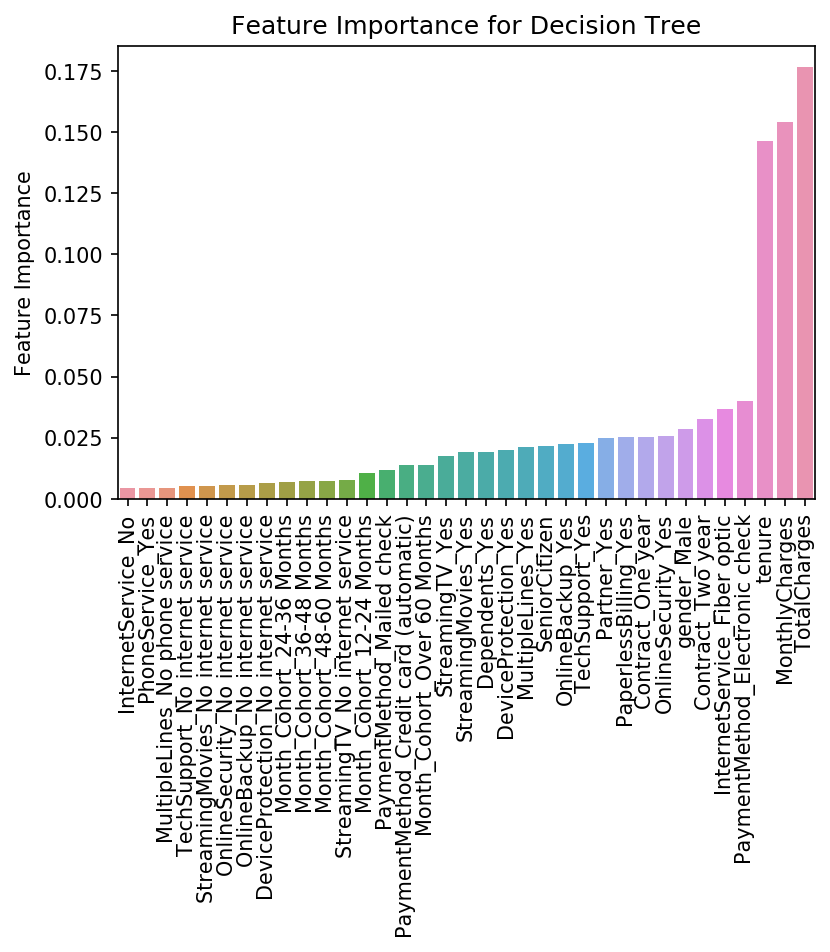

In [46]:
imp_feats = pd.DataFrame(data=rf.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(dpi=150)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree")

Random forest and decision tree share similarity on feature importance.

optimize random forest

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 50, 80],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [6, 8, 10],
    'n_estimators': [50, 100, 200]
}

In [49]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [50]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  6.3min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

## Boosted Trees

In [51]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [52]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
y_predict = ada_model.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1542
           1       0.64      0.51      0.57       568

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110

